<a href="https://colab.research.google.com/github/barissomeroglu10/Eyy_AI_Team/blob/main/Eyy_AI_Team.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***E-Commerce-Dataset ile Çalışılacak***

Bu model sonucunda amaçlanan veri setinde yer alan farklı metriklerin satış sayısına etkisini göstermektir. Bunun için headmap kullanılacaktır.

**1.1 Gerekli Kütüphaneleri Yükleme Aşaması**

In [3]:
import numpy as np # Numerical Python anlamına gelir ve yüksek performanslı sayısal işlemler için kullanılır
import pandas as pd # Veri işlenmesi ve veri analizi için kullanırız
import matplotlib.pyplot as plt # Veri görselleştirme kütüphanesidir (genelde 2D)
import seaborn as sns # Veri görselleştirme kütüphanesidir (genelde 3D)

**1.2 Veri Setininin Yüklenme Aşaması**

In [6]:
veri = pd.read_csv("E_Commerce_Dataset.csv")
# Veri seti üzerinde işlemler yapabilmek için bu veri setini veri adında bir değişkene atadık
# veri = pd.read_csv('/kaggle/input/e_commerce_data.csv') yöntemi ile de veri setini Kaggle'dan alabiliriz





>







**2. Veri Keşfi ve Ön İşleme Aşaması**

**2.1 Veri Seti Hakkında Genel Bilgiler Alma Aşaması**

In [7]:
print(veri.head())  # Veri setinin ilk beş satırını yazdırmak için .head kullanırız

  Ürün Adı    Kategori   Marka  Fiyat  Stok Miktarı  Satış Sayısı  \
0    Ürün5  Ev & Bahçe  Marka5     55            96           283   
1    Ürün8    Kozmetik  Marka1    120            37           835   
2    Ürün8    Aksesuar  Marka5    110            14           457   
3    Ürün9  Ev & Bahçe  Marka4    133             7           254   
4    Ürün2  Ev & Bahçe  Marka3    268            80            35   

   Yorum Sayısı  Ortalama Puan                       Tarih  
0             1            1.9  2024-02-17 15:18:45.291585  
1            11            4.0  2023-07-21 15:18:45.292898  
2             3            2.9  2024-03-19 15:18:45.293026  
3             8            4.7  2024-03-01 15:18:45.293077  
4            12            3.5  2024-05-21 15:18:45.293117  


In [8]:
print(veri.tail())  # Veri setinin son beş satırını yazdırmak için .tail kullanırız

    Ürün Adı    Kategori   Marka  Fiyat  Stok Miktarı  Satış Sayısı  \
995    Ürün1  Elektronik  Marka4    351            73           418   
996    Ürün8  Ev & Bahçe  Marka5    291            63           735   
997    Ürün8  Ev & Bahçe  Marka5    366            28           867   
998    Ürün4    Aksesuar  Marka1     24            29           610   
999    Ürün8       Giyim  Marka3    346            88           859   

     Yorum Sayısı  Ortalama Puan                       Tarih  
995            13            5.0  2023-06-24 15:18:45.327863  
996            33            4.4  2024-04-05 15:18:45.327894  
997             1            3.6  2024-04-26 15:18:45.327925  
998            24            3.8  2023-09-22 15:18:45.327955  
999            45            3.5  2023-09-22 15:18:45.327985  


In [9]:
print(veri.shape)
# Veri setinin boyutlarını görmek için bu deyimi kullanırız
# Çıkan sonuca göre 9000 adet veri olduğunu anlarız

(1000, 9)


In [10]:
print(veri.info())
# Veri seti hakkında bilgi almak için bu deyimi kullanırız
# Çıkan sonuca göre sütun adlarını ve sütunlarda bulunan verilerin tipini görürüz

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Ürün Adı       1000 non-null   object 
 1   Kategori       1000 non-null   object 
 2   Marka          1000 non-null   object 
 3   Fiyat          1000 non-null   int64  
 4   Stok Miktarı   1000 non-null   int64  
 5   Satış Sayısı   1000 non-null   int64  
 6   Yorum Sayısı   1000 non-null   int64  
 7   Ortalama Puan  1000 non-null   float64
 8   Tarih          1000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 70.4+ KB
None


In [11]:
print(veri.describe())
# Veri seti hakkında temel istatistiksel özeti görmek için bu deyimi kullanırız
# Bu özet bilgiler arasında ortalama, standart sapma, minimum, maksimum, çeyrekler gibi değerler bulunur
# Bu çıktılar veriyi anlamlandırmak, veri dağılımını görmek ve veri temizleme süreçlerine karar vermek için oldukça yararlıdır

# count sütunu, her sütundaki geçerli değerlerin sayısını gösterir, buna göre eksik veri yorumu yapabiliriz
# mean sütunu, her sütunun ortalama değerini gösterir
# std sütunu, her sütunun standart sapmasını gösterir. Standart sapma, verilerin ortalamadan ne kadar saptığını gösterir
# min sütunu, her sütunun en küçük değerini gösterir
# 25%, 50%, 75% sütunları, her sütunun çeyrek değerlerini gösterir
# max sütunu, her sütunun en büyük değerini gösterir

# mean ve 50% arasındaki fark, verilerin simetrik olup olmadığını gösterir. Büyük fark varsa, veriler asimetriktir
# 25%, 50%, 75% verilerin ne kadarının hangi aralıkta olduğunu gösterir.

# Bu bilgiler ile verinin dengesiz olup olmadığını, uç değerlerin varlığını ve eksik verilerin olup olmadığını tespit edebiliriz

             Fiyat  Stok Miktarı  Satış Sayısı  Yorum Sayısı  Ortalama Puan
count  1000.000000   1000.000000   1000.000000   1000.000000    1000.000000
mean    259.230000     50.301000    506.240000     24.870000       2.998900
std     138.472625     29.489388    283.187418     14.647513       1.154418
min      10.000000      0.000000      1.000000      0.000000       1.000000
25%     140.000000     24.000000    265.750000     13.000000       2.000000
50%     257.000000     51.000000    522.000000     25.000000       3.000000
75%     376.000000     76.000000    743.250000     37.000000       4.000000
max     500.000000    100.000000   1000.000000     50.000000       5.000000


**2.2 Eksik Veri Kontrolü Aşaması**

In [12]:
# 1. Yöntem
if veri.isnull().values.any() == True:
    print("Veri setinde eksik veri bulunmaktadır.")
else:
    print("Veri setinde eksik veri bulunmamaktadır.")

print("\n")

# 2. Yöntem
print(veri.isnull())
# Veri setinde eksik veri var mı yok mu diye kontrol etmek için bu deyimi kullanırız
# Çıkan sonuca göre eksik verinin olup olmadığını görürüz

Veri setinde eksik veri bulunmamaktadır.


     Ürün Adı  Kategori  Marka  Fiyat  Stok Miktarı  Satış Sayısı  \
0       False     False  False  False         False         False   
1       False     False  False  False         False         False   
2       False     False  False  False         False         False   
3       False     False  False  False         False         False   
4       False     False  False  False         False         False   
..        ...       ...    ...    ...           ...           ...   
995     False     False  False  False         False         False   
996     False     False  False  False         False         False   
997     False     False  False  False         False         False   
998     False     False  False  False         False         False   
999     False     False  False  False         False         False   

     Yorum Sayısı  Ortalama Puan  Tarih  
0           False          False  False  
1           False          False  False  
2 

**2.3 Veri Türlerinin Kontrolü**

In [13]:
print(veri.dtypes)
# Veri setinin sütun tipini görmek için bu deyimi kullanırız

Ürün Adı          object
Kategori          object
Marka             object
Fiyat              int64
Stok Miktarı       int64
Satış Sayısı       int64
Yorum Sayısı       int64
Ortalama Puan    float64
Tarih             object
dtype: object




>



**3 Veri Görselleştirme**

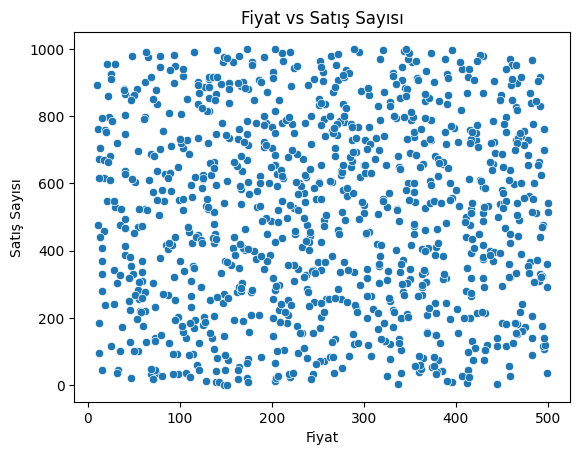

In [14]:
# Dağılım Grafiği (Scatter Plot)
# Bir değişkenin diğerine etkisini görmek için kullanılabilir
# Örneğin, fiyat ve satış sayısı arasındaki ilişkiyi şu şekilde görselleştirebiliriz:

sns.scatterplot(data=veri, x='Fiyat', y='Satış Sayısı')
plt.xlabel('Fiyat')
plt.ylabel('Satış Sayısı')
plt.title('Fiyat vs Satış Sayısı')
plt.show()

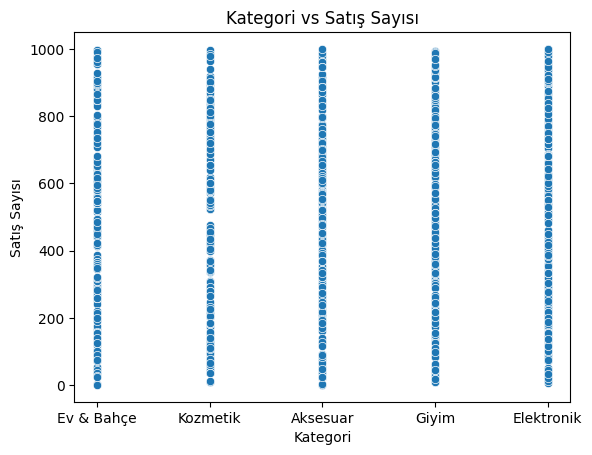

In [15]:
# Kategori ve Satış Sayısı Arasındaki Bağlantı
sns.scatterplot(data=veri, x='Kategori', y='Satış Sayısı')
plt.xlabel('Kategori')
plt.ylabel('Satış Sayısı')
plt.title('Kategori vs Satış Sayısı')
plt.show()

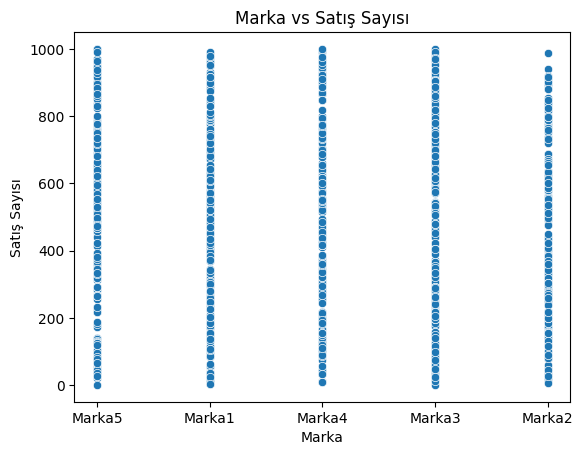

In [16]:
# Marka ve Satış Sayısı Arasındaki Bağlantı
sns.scatterplot(data=veri, x='Marka', y='Satış Sayısı')
plt.xlabel('Marka')
plt.ylabel('Satış Sayısı')
plt.title('Marka vs Satış Sayısı')
plt.show()

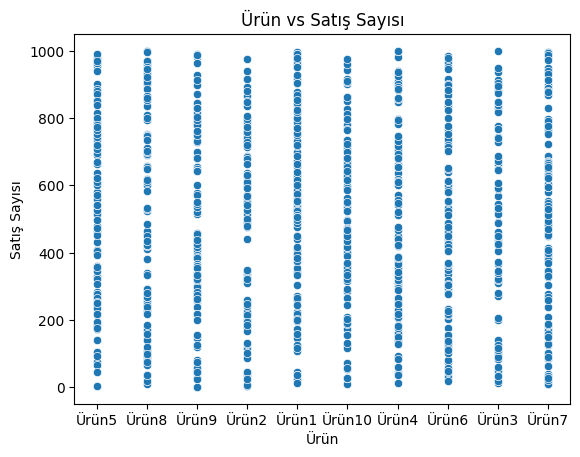

In [17]:
# Ürün ve Satış Sayısı Arasındaki Bağlantı
sns.scatterplot(data=veri, x='Ürün Adı', y='Satış Sayısı')
plt.xlabel('Ürün')
plt.ylabel('Satış Sayısı')
plt.title('Ürün vs Satış Sayısı')
plt.show()



>

>

>







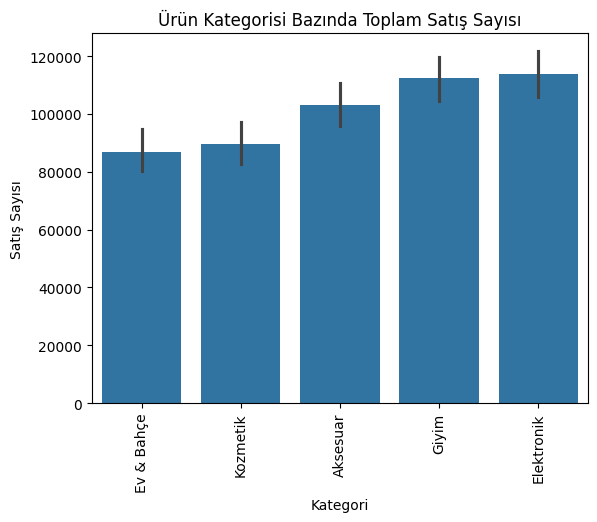

In [18]:
# Kategori bazlı verileri görselleştirmek için kullanılır
# Örneğin, her ürün kategorisinin toplam satış sayısını görmek için şu kod deyimi kullanılır:

sns.barplot(data=veri, x='Kategori', y='Satış Sayısı', estimator=sum)
plt.title('Ürün Kategorisi Bazında Toplam Satış Sayısı')
plt.xticks(rotation=90)
plt.show()

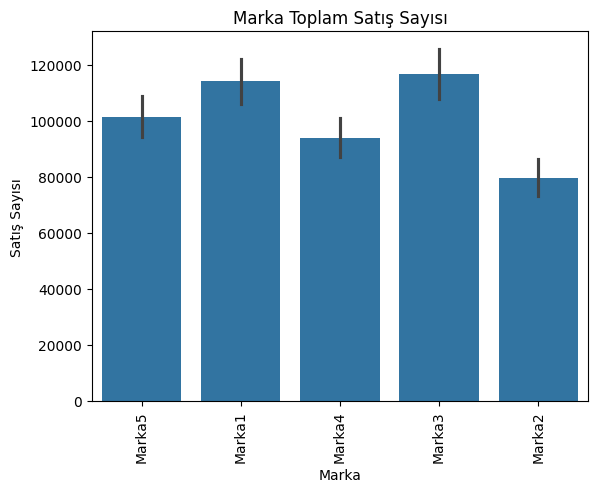

In [19]:
# Marka ve Satış Sayısı Arasındaki Bağlantı
sns.barplot(data=veri, x='Marka', y='Satış Sayısı', estimator=sum)
plt.title('Marka Toplam Satış Sayısı')
plt.xticks(rotation=90)
plt.show()

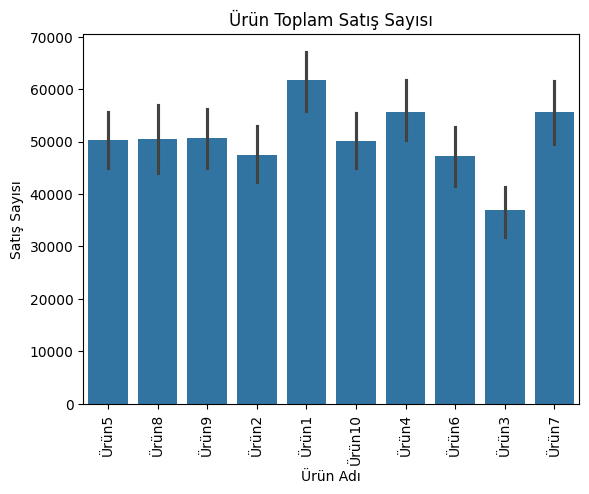

In [20]:
# Ürün ve Toplam Satış Sayısı Arasındaki Bağlantı
sns.barplot(data=veri, x='Ürün Adı', y='Satış Sayısı', estimator=sum)
plt.title('Ürün Toplam Satış Sayısı')
plt.xticks(rotation=90)
plt.show()



>

>

>







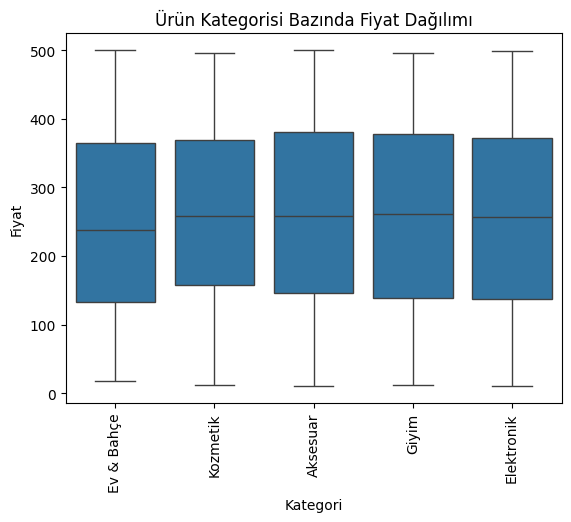

In [21]:
# Veri dağılımını ve aykırı değerleri görmek için box plot kullanılır
# Örneğin, her ürün kategorisindeki fiyat dağılımını görmek için aşağıdaki deyim kullanılabilir:

sns.boxplot(data=veri, x='Kategori', y='Fiyat')
plt.title('Ürün Kategorisi Bazında Fiyat Dağılımı')
plt.xticks(rotation=90)
plt.show()



>

>

>







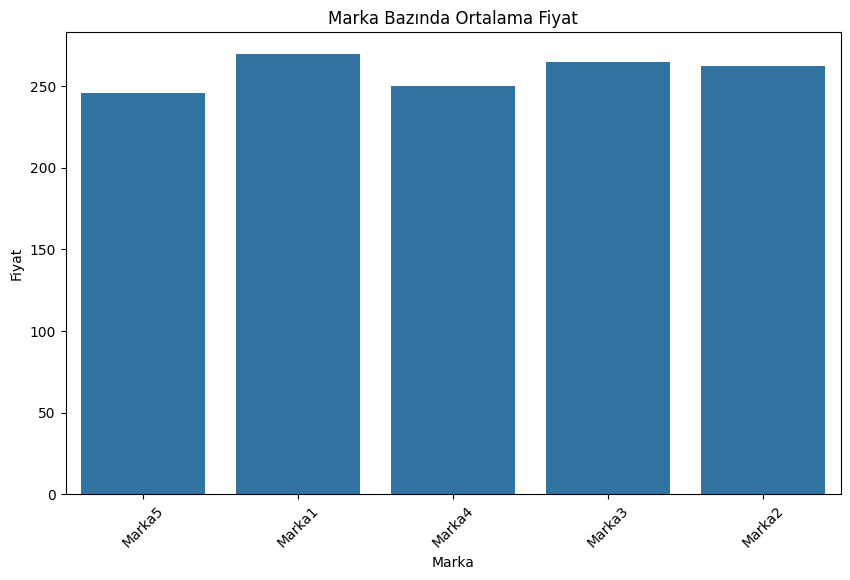

In [22]:
# Marka bazında ortlama fiyat
plt.figure(figsize=(10, 6))
sns.barplot(data=veri, x='Marka', y='Fiyat', estimator='mean', errorbar=None)
plt.title('Marka Bazında Ortalama Fiyat')
plt.xticks(rotation=45)
plt.show()

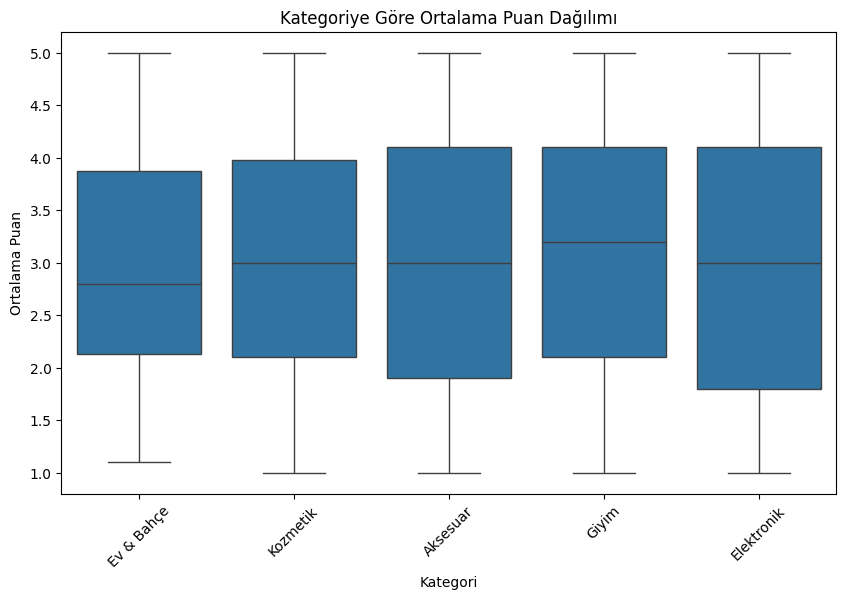

In [23]:
# Kategoriye Göre Ortalama Puan Dağılımı
plt.figure(figsize=(10, 6))
sns.boxplot(data=veri, x='Kategori', y='Ortalama Puan')
plt.title('Kategoriye Göre Ortalama Puan Dağılımı')
plt.xticks(rotation=45)
plt.show()



>

>

>








>

>

>







**4. Veri Ön İşleme ve Sayısallaştırma**





**4.1 Kategorik Verilerin Sayısallaştırılması**

Label Encoding

In [24]:
# Kategorik sütunları etiket kodlama ile sayısal değerlere dönüştürme aşaması

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
veri['Ürün Adı'] = label_encoder.fit_transform(veri['Ürün Adı'])
veri['Kategori'] = label_encoder.fit_transform(veri['Kategori'])
veri['Marka'] = label_encoder.fit_transform(veri['Marka'])

print(veri.head())

   Ürün Adı  Kategori  Marka  Fiyat  Stok Miktarı  Satış Sayısı  Yorum Sayısı  \
0         5         2      4     55            96           283             1   
1         8         4      0    120            37           835            11   
2         8         0      4    110            14           457             3   
3         9         2      3    133             7           254             8   
4         2         2      2    268            80            35            12   

   Ortalama Puan                       Tarih  
0            1.9  2024-02-17 15:18:45.291585  
1            4.0  2023-07-21 15:18:45.292898  
2            2.9  2024-03-19 15:18:45.293026  
3            4.7  2024-03-01 15:18:45.293077  
4            3.5  2024-05-21 15:18:45.293117  


**4.2 Veri Normalizasyonu**

In [25]:
# Min-Max scaling ile sayısal özellikleri normalize etme aşaması

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_cols = ['Fiyat', 'Stok Miktarı', 'Satış Sayısı', 'Yorum Sayısı', 'Ortalama Puan']
veri[num_cols] = scaler.fit_transform(veri[num_cols])

print(veri.head())

   Ürün Adı  Kategori  Marka     Fiyat  Stok Miktarı  Satış Sayısı  \
0         5         2      4  0.091837          0.96      0.282282   
1         8         4      0  0.224490          0.37      0.834835   
2         8         0      4  0.204082          0.14      0.456456   
3         9         2      3  0.251020          0.07      0.253253   
4         2         2      2  0.526531          0.80      0.034034   

   Yorum Sayısı  Ortalama Puan                       Tarih  
0          0.02          0.225  2024-02-17 15:18:45.291585  
1          0.22          0.750  2023-07-21 15:18:45.292898  
2          0.06          0.475  2024-03-19 15:18:45.293026  
3          0.16          0.925  2024-03-01 15:18:45.293077  
4          0.24          0.625  2024-05-21 15:18:45.293117  


**Tarih Sütununu Çıkarma**

Burada Tarih sütununu çıkarmamızın nedeni bu sütunun sayısal değerlere Korelasyon Analizi yapılırken dönüştürülememesidir

In [26]:
# Tarih/saat sütununu çıkarma
veri = veri.drop(columns=['Tarih'])
print(veri.head())

   Ürün Adı  Kategori  Marka     Fiyat  Stok Miktarı  Satış Sayısı  \
0         5         2      4  0.091837          0.96      0.282282   
1         8         4      0  0.224490          0.37      0.834835   
2         8         0      4  0.204082          0.14      0.456456   
3         9         2      3  0.251020          0.07      0.253253   
4         2         2      2  0.526531          0.80      0.034034   

   Yorum Sayısı  Ortalama Puan  
0          0.02          0.225  
1          0.22          0.750  
2          0.06          0.475  
3          0.16          0.925  
4          0.24          0.625  


**4.3 Headmap ile Korelasyon Analizi**

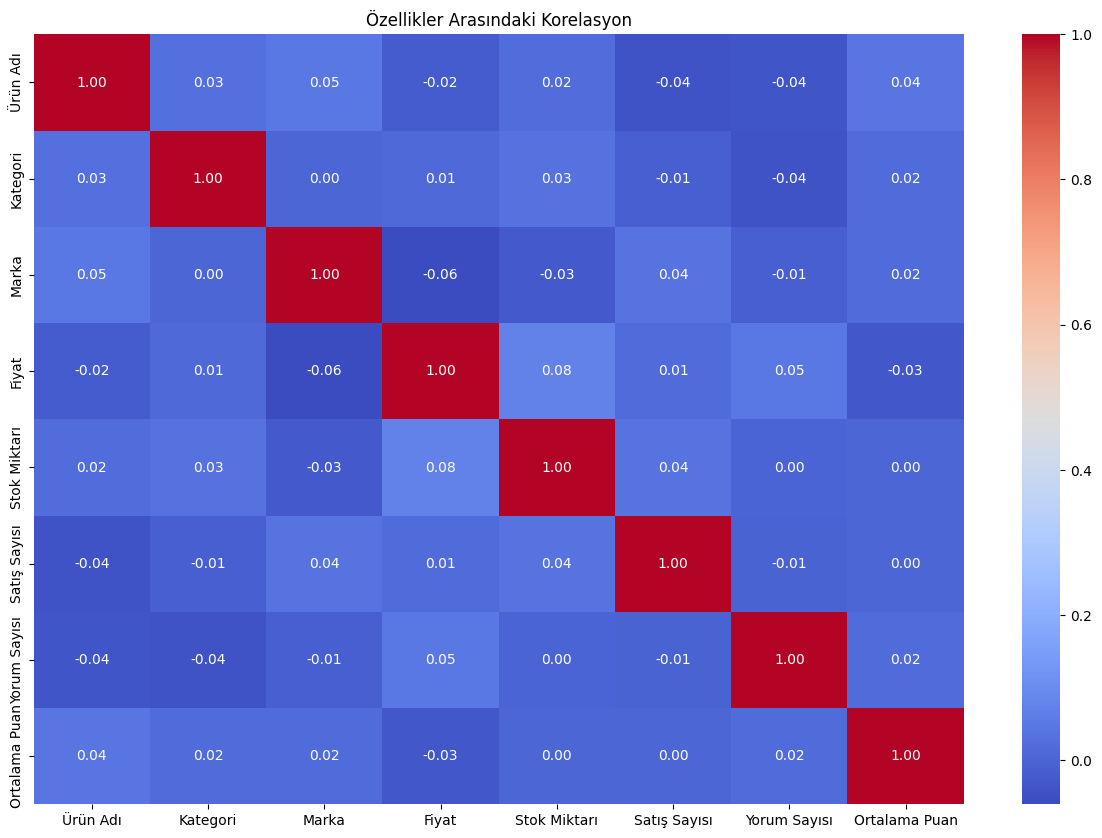

In [27]:
# Özellikler arasındaki korelasyonu görmek için ısı haritası oluşturacağız

plt.figure(figsize=(15, 10))
sns.heatmap(veri.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Özellikler Arasındaki Korelasyon')
plt.show()



>

>

>







**5. Model Oluşturma ve Değerlendirme**

Doğruluk (Accuracy): 0.305
Hassasiyet (Precision): 0.3034119555143651
Geri Çağırma (Recall): 0.305

Karışıklık Matrisi:
 [[26 24 16]
 [30 21 22]
 [27 20 14]]

Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.31      0.39      0.35        66
           1       0.32      0.29      0.30        73
           2       0.27      0.23      0.25        61

    accuracy                           0.30       200
   macro avg       0.30      0.30      0.30       200
weighted avg       0.30      0.30      0.30       200



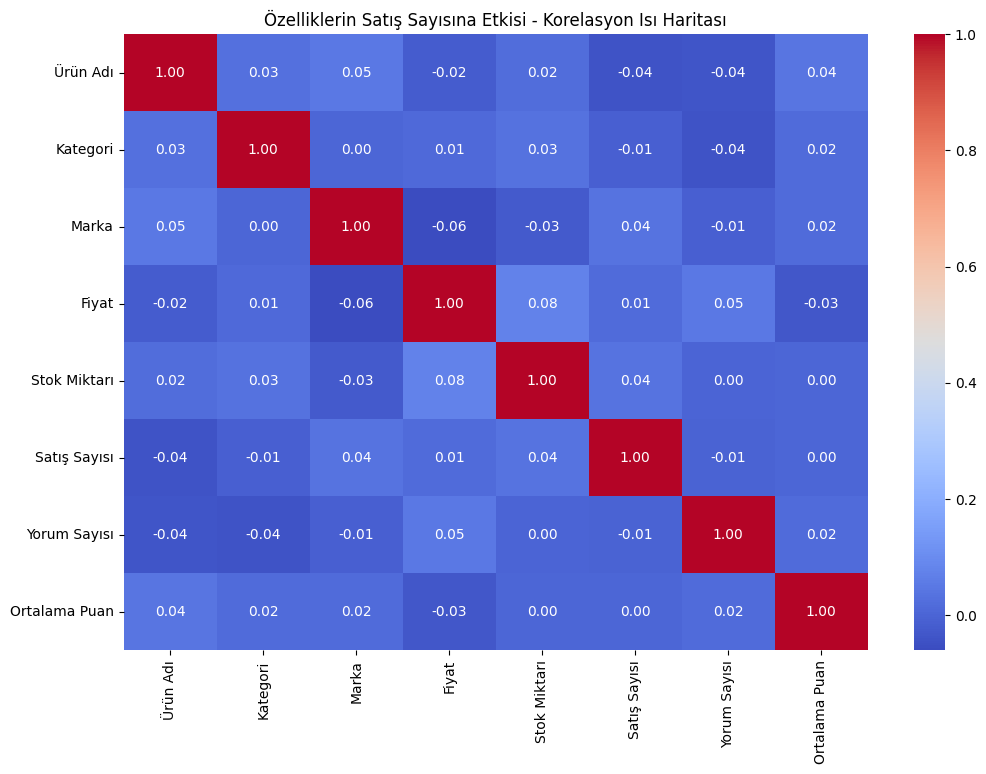

In [29]:
# İlgili kütüphanelerin yüklenmesi aşaması
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

# Logistic Regression sınıflandırma problemlerinde kullanılır ve bu nedenle bağımlı değişkenin kategorik (örneğin, ikili veya çok sınıflı) olması gerekir
# Bu durumda "Satış Sayısı" değişkenini kategorik hale getirmemiz gerekiyor. Bunu yapmak için "Satış Sayısı" değişkenini belirli aralıklara veya kategorilere ayırabiliriz
# Satış Sayısı'nı kategorilere ayırma aşaması
y_categories = pd.qcut(veri['Satış Sayısı'], q=3, labels=['düşük', 'orta', 'yüksek'])

# Kategorik etiketleri sayısal değerlere dönüştürme aşaması
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y_categories)

# Bağımlı ve bağımsız değişkenlerin belirlenmesi aşaması
X = veri.drop(columns=['Satış Sayısı'])

# Veri setinin eğitim ve test kümelerine bölünmesi aşaması
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression modelinin oluşturulması ve eğitilmesi aşaması
model = LogisticRegression()
model.fit(X_train, y_train)

# Modelin test kümesindeki performansının değerlendirilmesi aşaması
y_pred = model.predict(X_test)

# Değerlendirme metriklerinin hesaplanması aşaması
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Doğruluk (Accuracy):", accuracy)
print("Hassasiyet (Precision):", precision)
print("Geri Çağırma (Recall):", recall)
print("\nKarışıklık Matrisi:\n", conf_matrix)
print("\nSınıflandırma Raporu:\n", class_report)

# Korelasyon matrisini hesaplama aşaması
corr_matrix = veri.corr()

# Korelasyon ısı haritasını oluşturma aşaması
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Özelliklerin Satış Sayısına Etkisi - Korelasyon Isı Haritası')
plt.show()



>

>

>

>

>

>

>















HER ŞEY İÇİN TEŞEKKÜRLER CANER HOCAM ✈

SİZE HAYRAN KALDIK ♦

SEVİLİYORSUNUZ ❤

VAN YÜZÜNCÜ YIL ÜNİVERSİTESİ TEKNOLOJİ TOPLULUĞU ⌨